# Exploratory Data Analysis on the Most Streamed Spotify Songs of 2023 by Fabrigar, Hendrix Axel T.

##### This notebook shows the exploring, cleaning, and visualizing the data on the most streamed spotify songs of 2023

### Preparation for exploratory data analysis 


##### Importing needed libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

##### These are needed in order to execute and perform EDA on the given dataset

##### Pandas library will enable the reading and conversion of the dataset from the CSV file into a dataframe, it will enable commands that is neede to perform a EDA

##### Matplotlib.pyplot library will allow us to visualize data 

##### Seaborn library will allow the data to be visialized with color

___

### Loading the data as dataframe

In [13]:
#Load given dataset
df_spotify = pd.read_csv('spotify-2023 (2).csv', encoding='ISO-8859-1')
df_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


##### To load given data, pd.read_csv is to be used

##### The "encoding='ISO-8859-1'" is used because the given data set would not load without it

___

### Checking of the data

##### Check information of the dataset to know answers to questions provided

In [19]:
# Display the number of rows and columns of dataset
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

##### .info() was used to acquire the basic information of the given data

##### According to the .info(), there are 953 rows and 24 columns

##### The type of data in streams in_deezer_playlists, and in_shazam_charts are incorrectly detected as an object 

___

### Cleaning the data

##### Fixing the datatype for streams that were detected as objects


##### For the streams attribute

In [27]:
#To locate streams that are objects
df_spotify['streams'].iloc[574]

'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

In [28]:
#Convert streams to numeric values
df_spotify['streams'] = pd.to_numeric(df_spotify['streams'], errors = 'coerce')
df_spotify['streams']

0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
948     91473363.0
949    121871870.0
950     73513683.0
951    133895612.0
952     96007391.0
Name: streams, Length: 953, dtype: float64

In [29]:
# Locate row 574
df_spotify['streams'].iloc[574]

nan

##### Used errors is used as 'coerce' because if it is not used, it would not be able to convert the 574th row into a numerical value

##### Row 574th value is converted to nan and is now a missing value

##### The rows' song was 'Love Grows(Where My Rosemary Goes)' by Edison LightHouse and its value _____

##### Its value used to hold 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

##### According to research, the original song has received approximately 276,093,748 cumulative streams and 168,328 daily streams as of 2024/10/16, a total of 290 days since 2023

##### To account for the additional days, subtract 276,093,748 by 168,000 and multiply the result by 290, obtaining 227,373,748 streams.

##### With the new value, we have to store it in that row

In [37]:
df_spotify.at[574, 'streams'] = 227373748
df_spotify['streams'].iloc[574]
# fills missing value

227373748.0

### For the in_deezer_playlist attribute

In [39]:
#Float value
df_spotify['in_deezer_playlists'] = df_spotify['in_deezer_playlists'].str.replace(",","").astype(float)
df_spotify['in_deezer_playlists']

0       45.0
1       58.0
2       91.0
3      125.0
4       87.0
       ...  
948     37.0
949      8.0
950      7.0
951     17.0
952     32.0
Name: in_deezer_playlists, Length: 953, dtype: float64

##### The number with the commas is detected as an object

###### By using .str.replace(",",""), we can replace all the commas with a space making sure it can be all converted into a numerical value.

##### astype(float) is used to convert the values with a decimal 

### For the in_shazam_charts attribute

In [44]:
#Float Value
df_spotify['in_shazam_charts'] = df_spotify['in_shazam_charts'].str.replace(",","").astype(float)
df_spotify['in_shazam_charts']

0      826.0
1      382.0
2      949.0
3      548.0
4      425.0
       ...  
948      0.0
949      0.0
950      0.0
951      0.0
952      0.0
Name: in_shazam_charts, Length: 953, dtype: float64

___

### Handling duplicate tracks and values

##### .duplicate command is used to check for duplicates of rows 

##### Since there are no duplicate of rows in the given data, the .duplicated command has an added condition as (['track_name','artist(s)_name'])]

In [49]:
duplicate_tracks = pd.DataFrame(df_spotify[df_spotify.duplicated(['track_name','artist(s)_name'])])
# checks duplicated tracks

print("The duplicate tracks that is in the dataset are ")
print()
print(duplicate_tracks[['track_name','artist(s)_name']])
#Output result

The duplicate tracks that is in the dataset are 

           track_name artist(s)_name
482  SPIT IN MY FACE!       ThxSoMch
616    Take My Breath     The Weeknd
764   About Damn Time          Lizzo
873              SNAP      Rosa Linn


##### Re-releases and anomalies in the source data, including data entry mistakes or data collection techniques, are most likely the cause of the duplicated songs.

##### Since there are only four duplicate tracks, these should be removed, and only the first occurrence should remain.


### For 'SPIT IN MY FACE"

In [53]:
# Locate track 'SPIT IN MY FACE'
df_spotify.loc[(df_spotify['track_name']=='SPIT IN MY FACE!')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294.0,32,...,94,G#,Major,73,65,79,5,2,11,6
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854.0,1,...,166,C#,Major,70,57,57,9,20,11,7


##### Remove the wrong key and bpm 

In [55]:
# Remove duplicate
df_spotify.drop(index=345, inplace=True)
df_spotify.loc[(df_spotify['track_name']=='SPIT IN MY FACE!')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854.0,1,...,166,C#,Major,70,57,57,9,20,11,7


### For 'Take my breath'

In [57]:
#Locate track 'TAKE MY BREATH'
df_spotify.loc[(df_spotify['track_name']=='Take My Breath')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803.0,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334.0,174,...,121,G#,Major,75,53,74,2,0,11,5


##### Remove the wrong key and bpm 

In [59]:
#Remove duplicate
df_spotify.drop(index=512, inplace=True)
df_spotify.loc[(df_spotify['track_name']=='Take My Breath')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334.0,174,...,121,G#,Major,75,53,74,2,0,11,5


### For 'About Damn Time'

In [61]:
#Locate track 'About Damn Time'
df_spotify.loc[(df_spotify['track_name']=='About Damn Time')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473.0,0,...,109,A#,Minor,84,72,74,10,0,34,7
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473.0,242,...,109,A#,Minor,84,72,74,10,0,34,7


##### Keep the proper release date of the song

In [63]:
#Remove duplicate
df_spotify.drop(index=372, inplace=True)
df_spotify.loc[(df_spotify['track_name']=='About Damn Time')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473.0,242,...,109,A#,Minor,84,72,74,10,0,34,7


### For SNAP

In [65]:
#locate track 'SNAP'
df_spotify.loc[(df_spotify['track_name']=='SNAP')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468.0,148,...,170,NaN,Major,56,53,64,11,0,45,6
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595.0,3,...,170,NaN,Major,56,52,64,11,0,45,7


##### There is a difference between the information of duplicates and we should keep the most updated information

In [67]:
#Remove duplicate
df_spotify.drop(index=873, inplace=True)
df_spotify.loc[(df_spotify['track_name']=='SNAP')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468.0,148,...,170,NaN,Major,56,53,64,11,0,45,6


In [68]:
#Locate tracks with duplicate
df_spotify[df_spotify.duplicated(["track_name","artist(s)_name"])]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


___

### Missing Values

##### .isna() returns a bool value ___

##### .sum() counts all the true.isna and returns the value 

##### The missing_values>0 condition is used to only print attributes with missing values, allowing you to see which specific attributes have them.

In [74]:
#Locate tracks with missing values
missing_values = df_spotify.isna().sum()

print("The attributes that have missing values in the dataset are ")
print()
print(missing_values[missing_values>0])

The attributes that have missing values in the dataset are 

in_shazam_charts    50
key                 94
dtype: int64


In [75]:
#Calculate median of given track
shazam_median = df_spotify['in_shazam_charts'].median()
f"The median value of the 'in_shazam_charts' is {shazam_median}"

"The median value of the 'in_shazam_charts' is 3.0"

##### Imputation method is to be used when the missing values is less than 10% of the population

##### Since the key column's missing values are unique to each song and object datatype, we will simply mark them as missing. This is because the data is categorical and cannot be approximated using mean or median approaches.

##### Looking into it more, it appears that most data analysis software and algorithms presume that data are randomly missing.

##### I chose the median imputation approach for the missing values in the in_shazam_charts because it assumes that all of the data is randomly missing.

In [80]:
#Fill missing values
df_spotify['in_shazam_charts'].fillna(shazam_median, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_11680\2838702160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_spotify['in_shazam_charts'].fillna(shazam_median, inplace=True)


In [81]:
#Print output
missing_values = df_spotify.isna().sum()
print("The updated missing values are now ")
print()
print(missing_values[missing_values>0])

The updated missing values are now 

key    94
dtype: int64


##### With the removal of the rows containing missing key values, the missing values for in_shazam_charts have also decreased, making median imputation safer to carry out because it will keep the song's other variables while having less of an effect on the whole population.

In [83]:
#Fill missing values with the median
df_spotify['in_shazam_charts'].fillna(shazam_median, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_11680\3851771827.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_spotify['in_shazam_charts'].fillna(shazam_median, inplace=True)


##### Finally, since many rows were removed from the original dataframe, we should reset the index..fillna() is used to fill all nan values with something else, like the shazam_median, and inplace=True ensures that the action is performed on the original dataframe rather than in a separate copy.

In [85]:
#Reset index
df_spotify = df_spotify.reset_index(drop=True)

In [86]:
#Output
df_spotify.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     94
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

df_spotify.info()

___

### Overview of Dataset

##### The dataset initially contained 24 columns and roughly 953 rows. Following the data's pre-processing and preprocessing, 
1324 rows and the equal number of columns were the final size as a result.

##### Each column's datatype was determined to be either an object or a 64-bit integer, however several categories were mistakenly classified as objects. 
For example, in_shazam_charts, in_deezer_playlists, and streams. Following the data's pre-processing and preprocessing all three transforemed into a 64-bit float datatype,

##### adfijkbsdjfjdkwsf


___

### Basic Descriptive Statistics

In [95]:
#Print total streams
f"The total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].sum()}"

'The total streams of the most streamed spotify songs of 2023 is 487817069125.0'

In [96]:
#Print mean of the total streams
f"The mean of the total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].mean()}"

'The mean of the total streams of the most streamed spotify songs of 2023 is 514032738.8040042'

In [97]:
#Print total median of the streams
f"The median of the total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].median()}"

'The median of the total streams of the most streamed spotify songs of 2023 is 288101651.0'

In [98]:
#Print standard deviation of the total streams
f"The standard deviation of the total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].std()}"

'The standard deviation of the total streams of the most streamed spotify songs of 2023 is 567574571.0259988'

##### The fact that the mean is much higher than the median suggests that songs with more streams are given preference when determining the mean and 
It most likely grew as well since tracks that are credited to several artists were broken up.

##### To make analysis easier, let's examine the top ten songs that have been streamed on Spotify in 2023 by arranging the dataset from most to least streams and the number of streams distribution.

In [101]:
#Sort values by most streams
df_spotify[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
617,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09
162,One Dance,2.713922e+09
84,STAY (with Justin Bieber),2.665344e+09
140,Believer,2.594040e+09
722,Closer,2.591224e+09
48,Starboy,2.565530e+09


Text(0, 0.5, 'Number of Tracks')

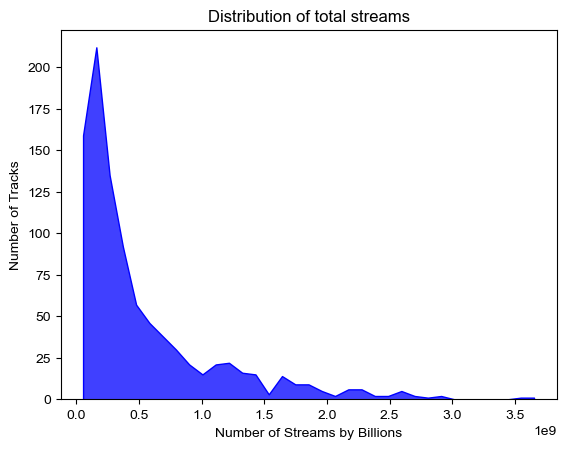

In [102]:
#print output of data by plot
sns.histplot(df_spotify, x= 'streams',color='blue', element="poly").set(title = 'Distribution of total streams')
sns.set_style("whitegrid", {'grid.linestyle': '--'})

plt.xlabel('Number of Streams by Billions')
plt.ylabel('Number of Tracks')

##### It can be seen from the graph that the highest streamed song has been streamed for above 3.5 billion

### Distribution of released_year and artist_count

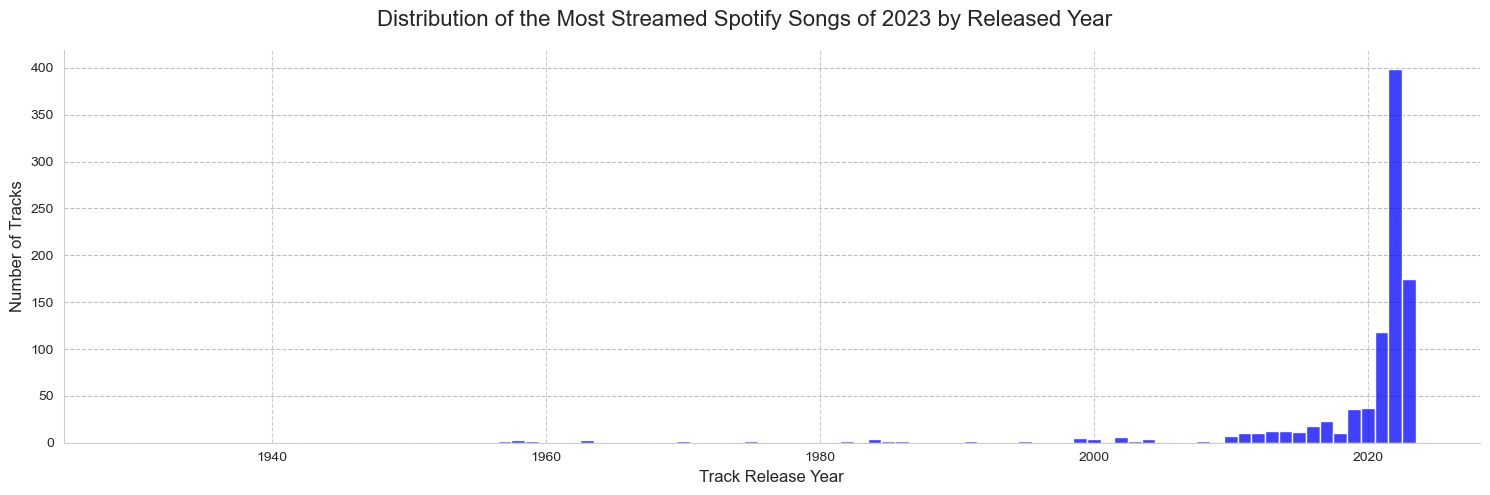

In [105]:
# Create the displot for the 'released_year' column
ryd = sns.displot(df_spotify, x='released_year', color='blue', discrete=True, aspect=3)

# Set the title for the plot
ryd.fig.suptitle("Distribution of the Most Streamed Spotify Songs of 2023 by Released Year", fontsize=16)

# Get the underlying axis to customize further
ax = ryd.ax

# Add gridlines along the y-axis
ax.grid(True, axis="y", color="gray", alpha=0.5)

# Set the labels for x and y axes
ax.set_xlabel('Track Release Year', fontsize=12)
ax.set_ylabel('Number of Tracks', fontsize=12)

# Adjust layout to avoid overlap (especially with long titles)
plt.tight_layout()

# Show the plot
plt.show()

##### The songs that have received the most Spotify streams in 2023 appear to be mainly from 2020 and, to a greater level, 2022.

##### Additionally, songs launched in 2022 would receive more plays because they had more time to acquire them than those released in 2023. Iit appears that, with the exception of a few goldies and several 2000s retro tunes, the distribution of the song's release year exhibits recency bias.


##### To check for the outliers of the data, we should look for the interquartile range.

In [109]:
# Calculate first quartile (25th percentile)
Q1ry = df_spotify['released_year'].quantile(0.25)

# Calculate third quartile (75th percentile)
Q3ry = df_spotify['released_year'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQRry = Q3ry - Q1ry

# Identify outliers: values outside the range (Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR)
outliers_ry = df_spotify[(df_spotify['released_year'] < Q1ry - 1.5 * IQRry) | (df_spotify['released_year'] > Q3ry + 1.5 * IQRry)]

# Get the number of outliers
ry_outliers_num = outliers_ry.shape[0]

# Return the message about outliers
outlier_message = f"There are about {ry_outliers_num} outliers in the release year of tracks."

# Optionally, display the outliers for further inspection
outliers_ry.head()  # Show the first few rows of the outliers for inspection (optional)

# Display the outlier message
outlier_message


'There are about 151 outliers in the release year of tracks.'

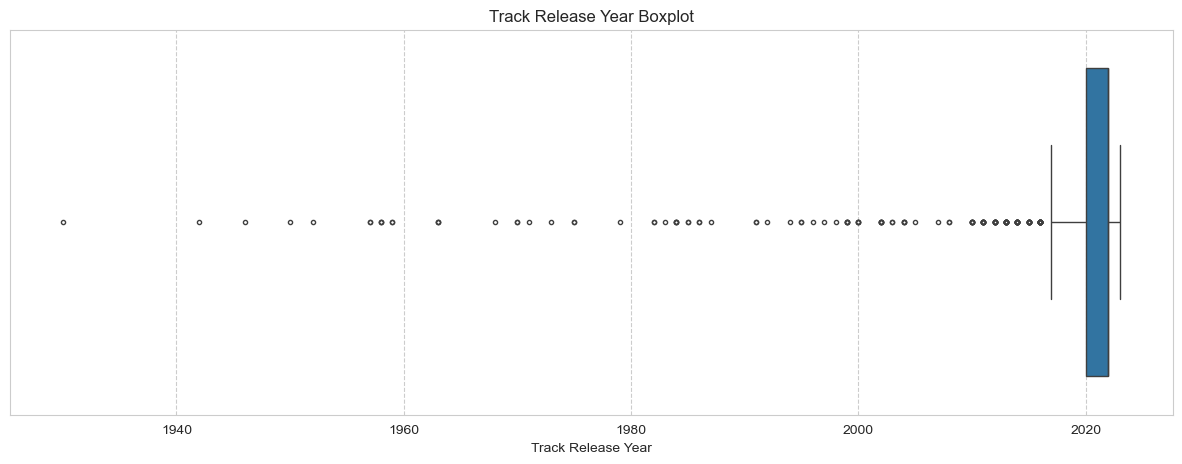

In [110]:
plt.figure(figsize=(15, 5))
# To size the boxplots

sns.boxplot(x=df_spotify['released_year'], fliersize=3)
# Creates boxplot and resize the outlier data points

plt.title("Track Release Year Boxplot") 
# Sets title for the boxplot
plt.xlabel("Track Release Year")
# Labels x-axis
plt.show()

Text(5.569444444444445, 0.5, 'Number of Tracks')

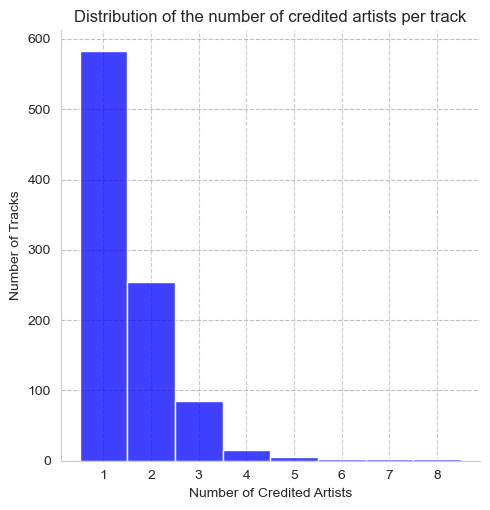

In [111]:
ac = sns.displot(df_spotify, x='artist_count', color='Blue', discrete=True).set(title = "Distribution of the number of credited artists per track")
# To plot the distrbution of the released_year along with its distribution line, and each year being represented
# To plot the distrbution of the released_year along with its distribution line, and each artist count being represented
# also labels title

sns.set_style("white")

ax = ac.ax
ax.grid(True, axis="y", color="gray", alpha=0.5)
# to place grids along the x_axis

plt.xlabel('Number of Credited Artists')
plt.ylabel('Number of Tracks')
# labels x and y axes

##### It appears that a single artist created the most streamed songs on Spotify in 2023. 
The likelihood of a song appearing on the list of the 2023 Spotify top songs decreases with the number of artists credited to it.

In [113]:
Q1ac = df_spotify['artist_count'].quantile(0.25)
Q3ac = df_spotify['artist_count'].quantile(0.75)
IQRac = Q3ac - Q1ac

# Equation for finding outliers within a given data
outliers_ac = df_spotify[(df_spotify['artist_count'] < Q1ac - 1.5 * IQRac) | (df_spotify['artist_count'] > Q3ac + 1.5 * IQRac)]
ac_outliers_num = outliers_ac.shape[0]
f"There are about {ac_outliers_num} outliers within the release year attributes of the tracks."

'There are about 27 outliers within the release year attributes of the tracks.'

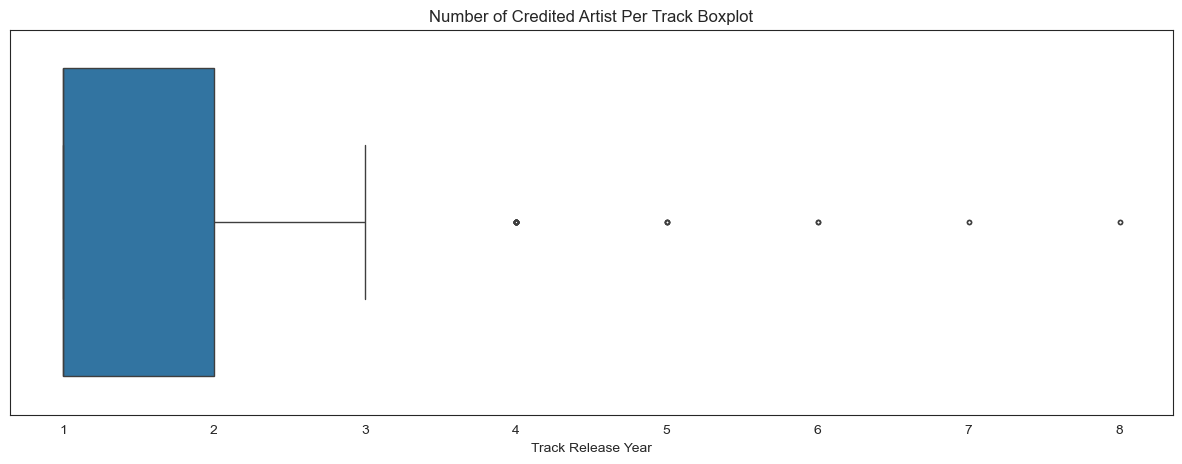

In [114]:
plt.figure(figsize=(15, 5))
# To size the boxplots

sns.boxplot(x=df_spotify['artist_count'], fliersize=3)
# Creates boxplot and resize the outlier data points

plt.title("Number of Credited Artist Per Track Boxplot") 
# Sets title for the boxplot
plt.xlabel("Track Release Year")
# Labels x-axis
plt.show()

___

### Top Performers

##### Top 5 most streamed albums/songs

In [118]:
df_spotify[['track_name', 'artist(s)_name','streams']].sort_values(by='streams', ascending=False).head()
# it sorts the data from greatest to least streams
# it locates and print the first 5 songs along with its track name and the number of streams

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
617,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


In [119]:
df_spotify['artist(s)_name'] = df_spotify['artist(s)_name'].str.split(',')
df_spotify['artist(s)_name']
# turns all the artists into a list and splits all of them with a column

0         [Latto,  Jung Kook]
1               [Myke Towers]
2            [Olivia Rodrigo]
3              [Taylor Swift]
4                 [Bad Bunny]
                ...          
944            [Selena Gomez]
945            [Taylor Swift]
946     [Feid,  Paulo Londra]
947    [Feid,  Sech,  Jhayco]
948               [Burna Boy]
Name: artist(s)_name, Length: 949, dtype: object

In [120]:
df_spotify = df_spotify.explode('artist(s)_name').reset_index(drop=True)
df_spotify['artist(s)_name'] = df_spotify['artist(s)_name'].str.strip()
df_spotify
# The .explode() makes it so that the list is counted as a row, we also reset index for cleaner analaysis
# The list of the seperated names in now stored in the column of the artist(s)_name
# The result can be seen below

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
1474,En La De Ella,Feid,3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5
1475,En La De Ella,Sech,3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5
1476,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


##### Since each artist is now independent, the artist_count attribute is no longer valid; hence, we should remove that entire column from the remainder of the EDA. 
We might now replace the attribute of the artist(s)_name as simply artist_name in order to also have clearer data.

### Top 5 most played artist based on number of songs/albums

In [135]:
# Print first 5 
df_spotify['artist(s)_name'].value_counts().head()

artist(s)_name
Bad Bunny         40
Taylor Swift      38
The Weeknd        36
Kendrick Lamar    23
SZA               23
Name: count, dtype: int64

___

### Temporal Trends

##### Number and month of releases

In [ ]:
sns.displot(data=df_spotify, x='released_year', element='poly', fill=False, discrete=True, aspect = 3)
# plots the tracks released vs the year it was released

plt.xlabel('Months')
plt.ylabel('Number of Tracks Released')
plt.title('Number of Tracks Released Per Month')
# labels the different parts of the plot such as the x-axis, y-axis, and the title

##### Releases over the month

In [ ]:
sns.displot(data=df_spotify, x='released_month', element='poly', fill=False, discrete=True, aspect = 3)
# plots the tracks released vs the months it was released on
sns.set_style("whitegrid", {'grid.linestyle': '--'})

plt.xlabel('Months')
plt.ylabel('Number of Tracks Released')
plt.title('Number of Tracks Released Per Month')
# labels the different parts of the plot such as the x-axis, y-axis, and the title


plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])
# uses calendar library to name the months for the x-axis

plt.xlim(1, 12)
# shows all the months
plt.show()

##### The months of January and May saw the highest number of releases, while August and September saw the fewest. 
It appears that there is no correlation between the most streamed songs on Spotify in 2023 and the month of release.

### Genre and Music Characteristics

In [ ]:
#obtain correlations between streams and the given musical attributrs
correlationstreams = df_spotify[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()['streams'].drop('streams')

print("Correlation of Streams with Musical Attributes: \n")
print(correlationstreams)

In [ ]:
#get correlation between danceability_% and energy_%
danceability_energy_corr = df_spotify['danceability_%'].corr(df_spotify['energy_%'])
print(f"Correlation between Danceability % and Energy %: {danceability_energy_corr:.2f}")

#get correlation between valence_% and acousticness_%
valence_acousticness_corr = df_spotify['valence_%'].corr(df_spotify['acousticness_%'])
print(f"Correlation between Valence % and Acousticness %: {valence_acousticness_corr:.2f}")

In [ ]:
#graph the correlation for the attributes
attributes = df_spotify[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']]
correlation_matrix = attributes.corr()

#create and plot using heatmap to observe the correlations 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, vmin = -1, vmax = 1, cmap='BuPu')
plt.title("Correlation Heatmap of Streams and the different Musical Atrributes")
plt.show()

___

### Platform Popularity

In [ ]:
track_platform_selected = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']

# Sum the occurrences of tracks across the selected platforms
platform_counts = df_spotify[track_platform_selected].sum()

# Create a bar plot for the summed occurrences of tracks
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')

# Apply a logarithmic scale to the y-axis to deal with large range of occurrences
plt.yscale('log')

# Title and axis labels
plt.title("Selected Platform Statistics vs. Number of Occurring Tracks", fontsize=14)
plt.xlabel("Selected Platform", fontsize=12)
plt.ylabel("Total Number of Occurrences (Log Scale)", fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
track_platform_selected = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']

# Calculate the mean of occurrences for each platform
platform_means = df_spotify[track_platform_selected].mean()

# Create a bar plot for the mean occurrences of tracks
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_means.index, y=platform_means.values, palette='viridis')

# Apply a logarithmic scale to the y-axis to deal with large range of occurrences
plt.yscale('log')

# Title and axis labels
plt.title("Selected Platform Statistics vs. Mean of Number of Occurring Tracks", fontsize=14)
plt.xlabel("Selected Platform", fontsize=12)
plt.ylabel("Mean Number of Occurrences (Log Scale)", fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

##### It appears that a song is streamed more frequently the more times it appears in Spotify playlists. It appears that the number of streams of a song is not shown in the Spotify charts or Apple Playlist.

##### It makes reasonable that Spotify playlists would show the most streamed songs because it is the most widely available and customisable app. Unlike Apple Music, it is likewise free to use and not restricted to any particular products.

In [ ]:
# List of selected platform charts
track_platform_charts = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']

# Calculate the mean of occurrences for each chart platform
chart_means = df_spotify[track_platform_charts].mean()

# Create a bar plot for the mean occurrences of tracks in platform charts
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=chart_means.index, y=chart_means.values, palette='viridis')

# Set title and axis labels
plt.title("Mean of Selected Platform Charts", fontsize=14)
plt.xlabel("Platform Charts", fontsize=12)
plt.ylabel("Mean Number of Occurrences", fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

##### The Shazam and Apple Music lists appear to be more representative of the Spotify tracks that have been streamed the most in 2023 than the Deezer and Spotify charts themselves

### Comparison of number of tracks/songs in playlist of platforms

In [ ]:
# List of selected platform playlists
track_platform_playlists = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Calculate the total occurrences of tracks for each platform
platform_playlist_totals = df_spotify[track_platform_playlists].sum()

# Create a bar plot for the total occurrences of tracks in platform playlists
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=platform_playlist_totals.index, y=platform_playlist_totals.values, palette='viridis')

# Set title and axis labels
plt.title("Playlists vs Total Number of Occurring Tracks", fontsize=14)
plt.xlabel("Platform Playlists", fontsize=12)
plt.ylabel("Number of Occurring Tracks (in Millions)", fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# List of selected platform playlists
track_platform_playlists = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Calculate the mean occurrences for each platform
platform_playlist_means = df_spotify[track_platform_playlists].mean()

# If you want to display the values in millions (optional), divide by 1,000,000
platform_playlist_means /= 1_000_000  # Convert to millions

# Create a bar plot for the mean occurrences of tracks in platform playlists
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=platform_playlist_means.index, y=platform_playlist_means.values, palette='viridis')

# Set title and axis labels
plt.title("Playlists vs Number of Tracks (Mean)", fontsize=14)
plt.xlabel("Platform Playlists", fontsize=12)
plt.ylabel("Mean Number of Occurring Tracks (in Millions)", fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

##### Spotify playlists continue to be the most significant predictor of track streams across other platforms' playlists.

___

### Advanced Analysis

In [ ]:
# Grouping by 'key' and counting the number of tracks per key
df_key_counts = pd.DataFrame(df_spotify.groupby("key").size())

# Sort by the 'key' alphabetically (or by number of tracks if preferred)
df_key_counts = df_key_counts.sort_values(by=0, ascending=False).reset_index()

# Renaming the second column to 'number_of_tracks'
df_key_counts = df_key_counts.rename(columns={0: 'number_of_tracks'})

# Filter out 'Missing' and NaN keys
df_key_counts = df_key_counts[df_key_counts['key'] != 'Missing']
df_key_counts = df_key_counts[df_key_counts['key'].notna()]

# Display the cleaned and sorted DataFrame
df_key_counts

In [ ]:
# Create the barplot
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
sns.barplot(x='key', y='number_of_tracks', data=df_key_counts, palette='Set2')

# Add title and axis labels
plt.title("Key Count Barplot", fontsize=16)
plt.xlabel("Keys", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


##### At 195 songs, C Sharp is the most common key. G is next at 155 songs, while both F and G Sharp are not far behind at 134 songs each.|

### Minor vs Major

In [ ]:
# Group by 'mode' and count the number of tracks per mode
df_mode_counts = pd.DataFrame(df_spotify.groupby("mode").size())

# Sort the DataFrame by the number of tracks in descending order
df_mode_counts = df_mode_counts.sort_values(by=0, ascending=False).reset_index()

# Rename the second column to 'number_of_tracks'
df_mode_counts = df_mode_counts.rename(columns={0: 'number_of_tracks'})

# Optionally, filter out missing values or any invalid modes if needed
df_mode_counts = df_mode_counts[df_mode_counts['mode'].notna()]

# Display the resulting DataFrame
df_mode_counts


In [ ]:
sns.barplot(df_mode_counts, x = 'mode', y = 'number_of_tracks', palette='Set2')
# Creates mode vs. number of tracks barplot and colors it

plt.title("Mode vs. Total Tracks Barplot")
plt.xlabel("Mode")
plt.ylabel("Number of Tracks")
# Labels the plot's title, x-title, and y-title

In [ ]:
# Define the platform columns that represent the presence of the artist in playlists
platform_playlists = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Group by artist name and sum the occurrences in playlists across platforms
df_artist_playlists = df_spotify.groupby('artist_name')[platform_playlists].sum()

# Create a total column by summing across the selected platforms for sorting purposes
df_artist_playlists['total_occurrences'] = df_artist_playlists[platform_playlists].sum(axis=1)

# Sort by the total occurrences in playlists across all platforms from greatest to least
df_artist_playlists = df_artist_playlists.sort_values(by='total_occurrences', ascending=False).reset_index()

# Select the relevant columns to display: artist name and occurrences across platforms
df_artist_playlists[['artist_name', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'total_occurrences']].head()

In [ ]:
# Create subplots for 3 bar plots (Spotify, Apple Music, Deezer)
fig, axes = plt.subplots(ncols=3, figsize=(20, 6))

# Sort the DataFrame by 'in_spotify_playlists' and plot top 5 artists
sns.barplot(data=df_artist_playlists.sort_values('in_spotify_playlists', ascending=False).head(5), 
            x='artist_name', y='in_spotify_playlists', palette='Set2', ax=axes[0])
axes[0].set(title='Artist vs. Occurrence in Spotify Playlists',
            xlabel='Top Occurring Artists', ylabel='Number of Occurrences')

# Sort the DataFrame by 'in_apple_playlists' and plot top 5 artists
sns.barplot(data=df_artist_playlists.sort_values('in_apple_playlists', ascending=False).head(5),
            x='artist_name', y='in_apple_playlists', palette='Set2', ax=axes[1])
axes[1].set(title='Artist vs. Occurrence in Apple Music Playlists',
            xlabel='Top Occurring Artists', ylabel='Number of Occurrences')

# Sort the DataFrame by 'in_deezer_playlists' and plot top 5 artists
sns.barplot(data=df_artist_playlists.sort_values('in_deezer_playlists', ascending=False).head(5),
            x='artist_name', y='in_deezer_playlists', palette='Set2', ax=axes[2])
axes[2].set(title='Artist vs. Occurrence in Deezer Playlists',
            xlabel='Top Occurring Artists', ylabel='Number of Occurrences')

# Adjust the layout to prevent overlapping text
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
df_artist_playlists['total_playlists'] = df_artist_playlists['in_spotify_playlists'] + df_artist_playlists['in_apple_playlists'] + df_artist_playlists['in_deezer_playlists']

In [ ]:
df_total_playlists = df_artist_playlists[['artist_name', 'total_playlists']].sort_values('total_playlists', ascending=False)


In [ ]:
df_total_playlists.reset_index(drop=True, inplace=True)


In [ ]:
df_total_playlists.head(10)


In [ ]:
# Create a barplot for the top 10 artists based on total playlists
plt.figure(figsize=(12, 6))
sns.barplot(x='artist_name', y='total_playlists', data=df_total_playlists.head(10), palette='Set2')

# Add title and labels
plt.title("Top 10 Artists by Total Playlist Occurrences Across Platforms", fontsize=16)
plt.xlabel("Artist Name", fontsize=12)
plt.ylabel("Total Playlist Occurrences", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()

### Summary of statistics in the given dataset

In [ ]:
summary_statistics = df_spotify.describe()
summary_statistics